In [17]:
# __author__ = 'Prakhar MISRA'
# Created 05/14/2020
# Last edit 05/14/2020
'''
#Purpose:
#-----------------
1. TO compare coal generation with air pollution

Reference:


# EDIT History


#Output expected:
#-----------------
# power generation in .csv format


#Terminology used:
#-----------------
#       
#       

# references
# ref 
# https://medium.com/@umerfarooq_26378/python-for-pdf-ef0fac2808b0
# readinf the PDF file that contain Table Data
# you can find find the pdf file with complete code in below
# read_pdf will save the pdf table into Pandas Dataframe

# report downloaded from https://nrldc.in/reports/daily-reports/daily-regional-power-supply-position/
'''

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os.path
import datetime
from functools import reduce
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from  glob import glob
import multiprocessing as mp
import tabula
import PyPDF2
#import rasterio

#%matplotlib notebookn
import helpers.fn_readPOSOCOpdf as rpp


currdir = os.getcwd()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Filepath declarations

In [13]:
# OUTPUTS

# path where all the .pdf reports to be converted are stored
powerConsumptionPath = (".\data\\Input\\DailyPower\\daily*") 
# os.path.join( currdir, "data", "Input", "DailyPower", "daily*.pdf")

# location of a sample pdf file report
pdfFileObj = open( os.path.join (currdir, "data\Input\DailyPower\daily010316.pdf"), 'rb')

# .csv data obtained from Robbie Anrew http://folk.uio.no/roberan/t/POSOCO.shtml
Coal_path = os.path.join(currdir, "data", "Input", "DailyPower", "ROBBIE_POSOCO_data.csv")
SPECIES = "OMNO2d"


# CUSTOMIZE THIS DICTIONARY FOR EACH POWER PLANT based on the reports. SAMPLE BELOW
# create a dictionary to store the page number to use and the official name of the pweor plant as per the pdf report
# create this dictionary by reading the pdf as df and identifying manually
dict_PP =dict()

#   powerplant name =                  pg num, official name, field name, column number of daily energy
dict_PP["DadriTPP"] = [4, "DADRI-IITPS( 2 * 490 )", "Unnamed: 7" ]
dict_PP["HarduaganjTPP"] = [3, "HARDUAGANJTPS( 1 * 105 + 1 * 60 + 2 *\r250 )",  "Unnamed: 5" ]
dict_PP["PanipatTPP1"] = [2, "PANIPATTPS( 1 * 210 + 2 * 250 )", "Unnamed: 6" ]
dict_PP["PanipatTPP2"] = [2, "PANIPATTPS( 2 * 210 + 2 * 250 )", "Unnamed: 5" ]
dict_PP["JhajjarTPP"] = [2, "JHAJJAR(CLP)( 2 * 660 )", "Unnamed: 5" ]
dict_PP["IGSTPP"] = [4, "ISTPP (JHAJJAR)( 3 * 500 )", "Unnamed: 7" ]

# OUTPUTS

# path to save the csv report
saveCSVPath = os.path.join( currdir, "data", "Output", "Activity_PowerPlant")


# pdf2csv for power-plant level data
read pdf, clean and Plots. Data dowloaded directly from POSOCO website

In [18]:
# run the pdf2csv conversion for the various power plants

PPName = "DadriTPP"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)

PPName = "HarduaganjTPP"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)

PPName = "PanipatTPP1"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)

PPName = "PanipatTPP2"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)

PPName = "JhajjarTPP"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)

PPName = "IGSTPP"
rpp.saveEnergycsv(powerConsumptionPath, saveCSVPath, dict_PP, PPName)


2019-03-01 5.94
error due to inconsistent format, trying the next page
2020-03-01 12.5
2019-04-01 6.77
error due to inconsistent format, trying the next page
2020-04-01 5.98
error due to inconsistent format, trying the next page
2019-05-01 12.22
2020-05-01 6.01
error due to inconsistent format, trying the next page
2019-06-01 14.86
2020-06-01 5.82
error due to inconsistent format, trying the next page
2019-07-01 17.31
2020-07-01 7.42
error due to inconsistent format, trying the next page
2019-08-01 13.14
Got stderr: May 24, 2021 10:49:28 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F1 are not implemented in PDFBox and will be ignored
May 24, 2021 10:49:28 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font CIDFont+F3 are not implemented in PDFBox and will be ignored

error due to inconsistent format, trying the next page
Got stderr: May 24, 2021 10:49:29 PM org.apache.pdfbox.pdmod

In [ ]:

# pdf file object
# you can find find the pdf file with complete code in below

#"E:\OneDrive - 総合地球環境学研究所\AQM_Research\Data\Raw\PowerGeneration\POSOCO_NRLDC\daily010520.pdf"

# pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# number of pages in pdf
print(pdfReader.numPages)

# a page object
pageObj = pdfReader.getPage(3)

# extracting text from page.
# this will print the text you can also save that into String
print(pageObj.extractText())

# explore Indira Gandhi power plant (IGSTPP) data

In [11]:
PPName = "IGSTPP"
fileName = "daily210520.pdf"
fileName = os.path.join( "Data", "Emission", "DailyPower", "daily010120.pdf")
page = dict_PP[PPName][0]
officialName = dict_PP[PPName][1]

fieldNameEnergy = dict_PP[PPName][2]
df = tabula.read_pdf(fileName,multiple_tables=True, pages = page)[0]
fieldNamePP = df.columns[0]
df[df[fieldNamePP]==officialName]["Unnamed: 7"]#.values[0]

3    6.68
Name: Unnamed: 7, dtype: object

In [7]:
# display the dataframe
df

,3(B)Regional Entities Generation,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Station/Constituents,Inst.\rCapacity,Declared Capacity,19:00,03:00,Day Peak,Day Energy,AVG. MW,UI,NaN,NaN
1,NaN,(MW),(MW),Peak MW,Off Peak\rMW,(MW),Hrs,SCHD\r(MU),ACT (MU),NaN,NaN
2,Aravali Power Company Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ISTPP (JHAJJAR)( 3 * 500 ),"1,500",942.5,285,289,503,10:55,6.72,6.68,278,-0.04
4,Sub-Total,"1,500",942.5,285,289,-,-,6.72,6.68,278,-0.04
5,BBMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BHAKRA HPS( 2 * 108 + 3 * 126\r+ 5 * 157 ),"1,379","1,119","1,136",413,"1,136",19:00,14.85,15.02,626,0.17
7,DEHARHPS( 6 * 165 ),990,465,480,0,480,19:00,3.11,3.22,134,0.11
8,PONGHPS( 6 * 66 ),396,188,192,192,192,19:00,3.99,4.03,168,0.04
9,Sub-Total,"2,765","1,772","1,808",605,-,-,21.95,22.27,928,0.32


# whole north india
North Indian power consumption data aggregated, cleaned and already converted to .csv  is available from Robbie Anrew http://folk.uio.no/roberan/t/POSOCO.shtml 


In [2]:
# North Indian aggregated data from Robbie Anrew http://folk.uio.no/roberan/t/POSOCO.shtml 

def read_csv(Coal_path):
    df = pd.read_csv(Coal_path)
    df["date"] = pd.to_datetime(df["yyyymmdd"], format = "%Y%m%d")
    df["year"] = df["date"].dt.year
    df["doy"] = df["date"].dt.dayofyear
    df["month"] = df["date"].dt.month
    df["week"] = df["date"].dt.week
    df = df.set_index("date")
    
    return df

   
# read the csv
df_GM = read_csv(Coal_path)

StartDate = datetime.datetime(2015, 1, 1)
# there is also double counting of weeks at then end or start of year. need to get rid of them by making an indicator for weeks since 2015-01-01.
df_GM["days_since"] = (df_GM.index - StartDate)
df_GM["weeks_since"] = (df_GM["days_since"].dt.days/7).astype('uint16')

print(df_GM.columns.tolist())

['yyyymmdd', 'NR: DemandMet', 'NR: PeakShortage', 'NR: EnergyMet', 'NR: HydroGen', 'NR: WindGen', 'NR: SolarGen', 'NR: EnergyShortage', 'NR: MaximumDemand', 'WR: DemandMet', 'WR: PeakShortage', 'WR: EnergyMet', 'WR: HydroGen', 'WR: WindGen', 'WR: SolarGen', 'WR: EnergyShortage', 'WR: MaximumDemand', 'SR: DemandMet', 'SR: PeakShortage', 'SR: EnergyMet', 'SR: HydroGen', 'SR: WindGen', 'SR: SolarGen', 'SR: EnergyShortage', 'SR: MaximumDemand', 'ER: DemandMet', 'ER: PeakShortage', 'ER: EnergyMet', 'ER: HydroGen', 'ER: WindGen', 'ER: SolarGen', 'ER: EnergyShortage', 'ER: MaximumDemand', 'NER: DemandMet', 'NER: PeakShortage', 'NER: EnergyMet', 'NER: HydroGen', 'NER: WindGen', 'NER: SolarGen', 'NER: EnergyShortage', 'NER: MaximumDemand', 'India: DemandMet', 'India: PeakShortage', 'India: EnergyMet', 'India: HydroGen', 'India: WindGen', 'India: SolarGen', 'India: EnergyShortage', 'India: MaximumDemand', 'NR: Thermal', 'NR: Coal', 'NR: Lignite', 'NR: Hydro', 'NR: Nuclear', 'NR: Gas', 'NR: RES',

# plot the aggregated trend of North Indian power plants

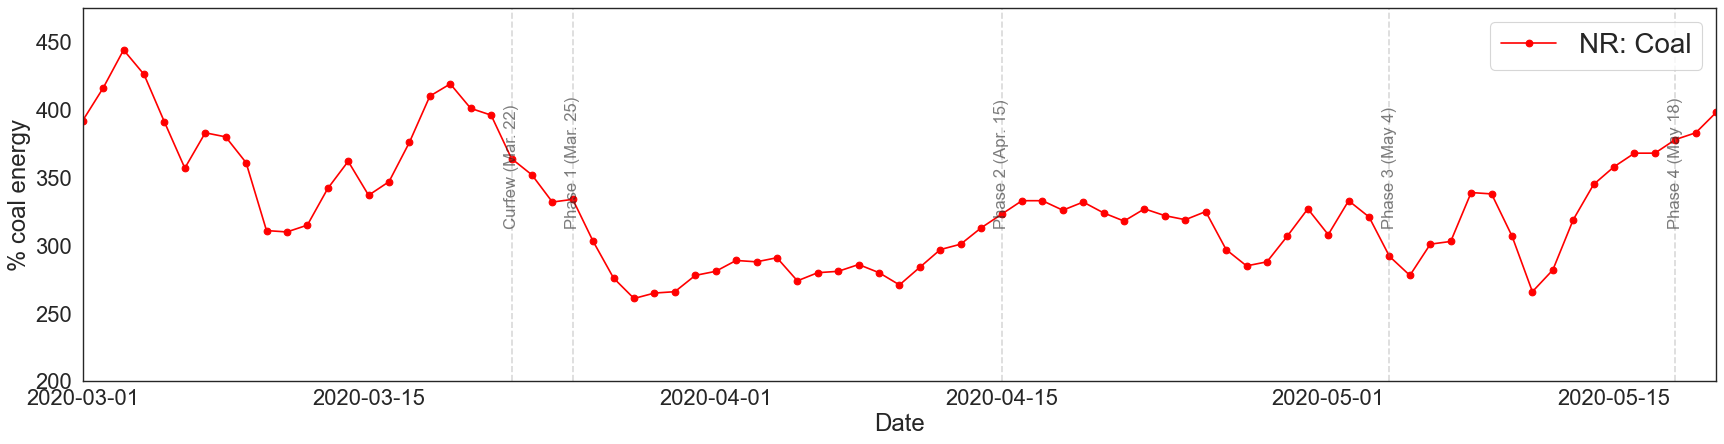

In [3]:
# plot the mean and annual trends

def plotNIndPPTrend(df_GM, SAVEPATH):
    # plot the trend of the aggregated data 

    %matplotlib inline
    sns.set(font_scale=1.8)
    sns.set_style("white")


    df_AQ = df_GM
    YLIM_U = 500
    YLABEL = "% coal energy"
    SPECIES1 = 'workplaces_percent_change_from_baseline'
    #SPECIES2 = 'retail_and_recreation_percent_change_from_baseline'
    Curfew = datetime.datetime(2020, 3, 22)
    Lockdown1 = datetime.datetime(2020, 3, 25)
    Lockdown2 = datetime.datetime(2020, 4, 15)
    Lockdown3 = datetime.datetime(2020, 5, 4)
    Lockdown4 = datetime.datetime(2020, 5, 18)

    #df_GM["sub_region_1" = "Delhi"]

    df_AQ['doy'] = df_GM.index.dayofyear
    df1 = df_GM.copy()

    fig=plt.figure(figsize=(22, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    cmap = plt.get_cmap ( "viridis" )

    df_yy = df1

    SPECIES = "NR: Coal"
    x = df_yy[SPECIES].index
    y = df_yy[SPECIES]
    ax.plot(x,y,color = "red", marker = 'o', alpha = 1, label = SPECIES )# alpha = clearsky)

    SPECIES = "SR: Coal"
    x = df_yy[SPECIES].index
    y = df_yy[SPECIES]
    #ax.plot(x,y,color = "blue", marker = 'o', alpha = 1, label = SPECIES )# alpha = clearsky)


    # region = "Haryana"
    # x = df_yy[df_yy["sub_region_1"] == region].index
    # y = df_yy[df_yy["sub_region_1"] == region][SPECIES1]
    # ax.plot(x,y,color = "blue", marker = '^', alpha = 0.8, label = "Haryana" )# alpha = clearsky)

    # region = "Uttar Pradesh"
    # x = df_yy[df_yy["sub_region_1"] == region].index
    # y = df_yy[df_yy["sub_region_1"] == region][SPECIES1]
    # ax.plot(x,y,color = "green", marker = '>', alpha = 0.8, label = "Uttar Pradesh")# alpha = clearsky)




    # ---   annotate the lockdown --- # 
    arrowprops = {'width': 1, 'headwidth': 1, 'headlength': 1, 'shrink':0.05 }

    ax.axvline(Curfew, color='grey',alpha = 0.3, linestyle = '--')
    ax.annotate('Curfew (Mar. 22)', xy=(Curfew, 0.6*YLIM_U), xytext=(0, 15), textcoords='offset points',
                rotation=90, va='bottom', ha='center', annotation_clip=True, alpha = 0.6, size = 15 ) # arrowprops=arrowprops,

    ax.axvline(Lockdown1, color='grey',alpha = 0.3, linestyle = '--')
    ax.annotate('Phase 1 (Mar. 25)', xy=(Lockdown1, 0.6*YLIM_U), xytext=(0, 15), textcoords='offset points',
                rotation=90, va='bottom', ha='center', annotation_clip=True, alpha = 0.6, size = 15 ) # arrowprops=arrowprops,

    ax.axvline(Lockdown2, color='grey',alpha = 0.3, linestyle = '--')
    ax.annotate('Phase 2 (Apr. 15)', xy=(Lockdown2, 0.6*YLIM_U), xytext=(0, 15), textcoords='offset points',
                rotation=90, va='bottom', ha='center', annotation_clip=True, alpha = 0.6, size = 15 ) # arrowprops=arrowprops,

    ax.axvline(Lockdown3, color='grey',alpha = 0.3, linestyle = '--')
    ax.annotate('Phase 3 (May 4)', xy=(Lockdown3, 0.6*YLIM_U), xytext=(0, 15), textcoords='offset points',
                rotation=90, va='bottom', ha='center', annotation_clip=True, alpha = 0.6, size = 15 ) # arrowprops=arrowprops,

    ax.axvline(Lockdown4, color='grey',alpha = 0.3, linestyle = '--')
    ax.annotate('Phase 4 (May 18)', xy=(Lockdown4, 0.6*YLIM_U), xytext=(0, 15), textcoords='offset points',
                rotation=90, va='bottom', ha='center', annotation_clip=True, alpha = 0.6, size = 15 ) # arrowprops=arrowprops,


    plt.tick_params(axis="x", direction="inout")
    plt.xlim(datetime.datetime(2020, 3, 1), datetime.datetime(2020, 5, 20))
    plt.ylim([YLIM_L,YLIM_U*0.95])
    plt.ylabel(YLABEL)
    plt.xlabel("Date")
    #plt.title("Trend over National Capital Region for " + SPECIES)
    plt.legend(loc = "upper right", ncol = 4, fontsize = 25)
    plt.tight_layout()
    plt.savefig(SAVEPATH, bbox_inches = "tight")



# run the function
SAVEPATH = os.path.join(currdir, "Plots", "CoalEnergy_20200515.png"  )
plotNIndPPTrend(df_GM, SAVEPATH)
